In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [26]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [27]:
# Make data 3d for convolution

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [29]:
K = len(set(y_train))
# find number of classes
print(f"Number of classes: {K}")

Number of classes: 10


In [30]:
# Building the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [31]:
# Complile/fit the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5249 - accuracy: 0.8046 - val_loss: 0.3913 - val_accuracy: 0.8534
Epoch 2/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3556 - accuracy: 0.8679 - val_loss: 0.3360 - val_accuracy: 0.8732
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3063 - accuracy: 0.8854 - val_loss: 0.3107 - val_accuracy: 0.8861
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2773 - accuracy: 0.8945 - val_loss: 0.3100 - val_accuracy: 0.8881
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2516 - accuracy: 0.9052 - val_loss: 0.2897 - val_accuracy: 0.8918
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2322 - accuracy: 0.9117 - val_loss: 0.3088 - val_accuracy: 0.8921
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2138 - accuracy: 0.9192 - val_loss: 0.3061 -

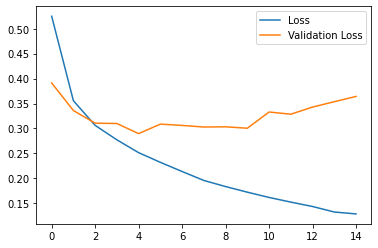

In [33]:
# Analysis of model in terms of loss per iteration 

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

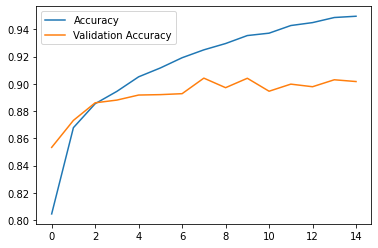

In [34]:
# Analysis of model in terms of accuracy

plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Predicted: 9. Answer: 9.


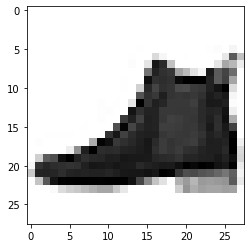

In [50]:
# Visually look at the model's accuracy
image_index = 123 # test data is from 0-9999

# Classes:
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
acc = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(f"Predicted: {acc.argmax()}. Answer: {y_test[image_index]}.")

Predicted: 4. Answer: 6.


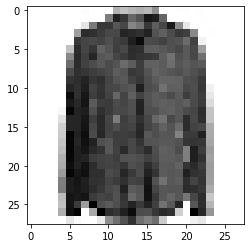

In [51]:
# Example of misclassified fashion item
image_index = 44 # test data is from 0-9999

plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
acc = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(f"Predicted: {acc.argmax()}. Answer: {y_test[image_index]}.")